In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [72]:
bfs = pd.read_csv('BFS_train.csv')
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [73]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [74]:
bfs1 = bfs.copy()
bfs1.Product_Category_2 = bfs.Product_Category_2.fillna(value = 0)
bfs1.Product_Category_3 = bfs1.Product_Category_3.fillna(value = 0)
bfs1.shape

(550068, 12)

In [75]:
bfs2 = bfs1.drop(['User_ID','Product_ID'], axis = 'columns')
bfs2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [76]:
bfs2.shape

(550068, 10)

In [77]:
X = bfs2.drop(['Purchase'], axis = 'columns')
y =  bfs2.Purchase

In [24]:
from sklearn.preprocessing import MinMaxScaler
categorical = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
numerical = ['Occupation', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']
X_ohe = pd.get_dummies(X, columns = categorical, drop_first = True)
X_ohe = X_ohe.drop(numerical, axis = 'columns')
ms = MinMaxScaler()
X_num = pd.DataFrame(ms.fit_transform(X[numerical]), index = X.index, columns = numerical)
X_new = pd.concat([X_ohe, X_num], axis = 1)
X_new.head()

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.5,0.0,0.105263,0.000000,0.000000
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.5,0.0,0.000000,0.333333,0.777778
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0.5,0.0,0.578947,0.000000,0.000000
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0.5,0.0,0.578947,0.777778,0.000000
4,1,0,0,0,0,0,1,0,1,0,0,0,1,0.8,0.0,0.368421,0.000000,0.000000


In [25]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size = 0.4, random_state = 0)

#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

In [26]:
#Lasso Regression
lso = Lasso()
lso.fit(X_train, y_train)
lso_score = lso.score(X_test, y_test)

In [27]:
#Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)

In [29]:
Model = ['Linear Regression', 'Lasso' ,'Decision Tree','XGBoost']
score = [lr_score,lso_score, dt_score, xgb_score]
final_score = pd.DataFrame({'Model': Model, 'Score':score}, columns = ['Model', 'Score'])

In [30]:
final_score

,Model,Score
0,Linear Regression,0.153035
1,Lasso,0.152976
2,Decision Tree,0.545021
3,XGBoost,0.648040


In [28]:
#XGBoost
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
xgb_score = xgb.score(X_test, y_test)

[02:19:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_new,y)

,model,best_score,best_params
0,linear_regression,0.151650,{'normalize': True}
1,lasso,0.151606,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.562732,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [98]:
test = pd.read_csv('BFS_test.csv')
y_test = pd.read_csv('sample_submission_V9Inaty.csv')

In [39]:
categorical = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
numerical = ['Occupation', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']
Y_ohe = pd.get_dummies(test, columns = categorical, drop_first = True)
Y_ohe = Y_ohe.drop(numerical, axis = 'columns')
ms = MinMaxScaler()
Y_num = pd.DataFrame(ms.fit_transform(test[numerical]), index = test.index, columns = numerical)
Y_new = pd.concat([Y_ohe, Y_num], axis = 1)
Y_new.head()

,User_ID,Product_ID,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,0,0,0,1,0,0,1,0,0,1,0,0,0.35,1.0,0.000000,0.5625,NaN
1,1000009,P00113442,1,0,1,0,0,0,0,0,1,0,0,0,0,0.85,0.0,0.117647,0.1875,NaN
2,1000010,P00288442,0,0,0,1,0,0,0,1,0,0,0,0,1,0.05,1.0,0.235294,0.7500,NaN
3,1000010,P00145342,0,0,0,1,0,0,0,1,0,0,0,0,1,0.05,1.0,0.176471,0.4375,NaN
4,1000011,P00053842,0,0,1,0,0,0,0,0,1,1,0,0,0,0.05,0.0,0.176471,0.1875,0.6


In [40]:
Y_new = Y_new.drop(['User_ID', 'Product_ID'], axis = 'columns')

In [44]:
y_pred = xgb.predict(Y_new)
y_pred

array([13508.125 , 10332.342 ,  6144.718 , ..., 13321.82  ,  4832.85  ,
        3014.6865], dtype=float32)

In [46]:
y_test.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [47]:
final_data = {'Purchase': y_pred, 'User_ID': y_test.User_ID, 'Product_ID': y_test.Product_ID}
submission = pd.DataFrame(data=final_data)
submission.to_csv('finalsub.csv',index =False)

# PART 2

<AxesSubplot:>

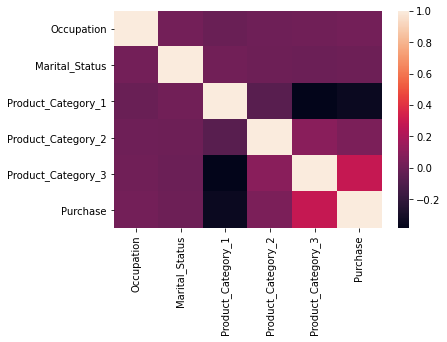

In [50]:
corr = bfs2.corr()
sns.heatmap(corr)

In [78]:
new_X = bfs2[['City_Category', 'Gender', 'Product_Category_1', 'Product_Category_3']]
new_Y = bfs2.Purchase

In [79]:
new_X.head()

,City_Category,Gender,Product_Category_1,Product_Category_3
0,A,F,3,0.0
1,A,F,1,14.0
2,A,F,12,0.0
3,A,F,12,0.0
4,C,M,8,0.0


In [80]:
cate = ['Gender', 'City_Category']
num = ['Product_Category_1', 'Product_Category_3']
N_ohe = pd.get_dummies(new_X, columns = cate, drop_first = True)
N_ohe = N_ohe.drop(num, axis = 'columns')
ms = MinMaxScaler()
N_num = pd.DataFrame(ms.fit_transform(new_X[num]), index = new_X.index, columns = num)
N_new = pd.concat([N_ohe, N_num], axis = 1)
N_new.head()

,Gender_M,City_Category_B,City_Category_C,Product_Category_1,Product_Category_3
0,0,0,0,0.105263,0.000000
1,0,0,0,0.000000,0.777778
2,0,0,0,0.578947,0.000000
3,0,0,0,0.578947,0.000000
4,1,0,1,0.368421,0.000000


In [81]:
X_train, X_test, y_train, y_test = train_test_split(N_new, new_Y, test_size =0.4, random_state = 0)
#Linear Regression
lr.fit(X_train, y_train)
lr_s = lr.score(X_test, y_test)

In [82]:
lso.fit(X_train, y_train)
lso_s = lso.score(X_test, y_test)

In [83]:
dt.fit(X_train, y_train)
dt_s = dt.score(X_test, y_test)

In [84]:
xgb.fit(X_train, y_train)
xgb_s = xgb.score(X_test, y_test)

[03:01:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [85]:
Model = ['Linear Regression', 'Lasso' ,'Decision Tree','XGBoost']
score = [lr_s,lso_s, dt_s, xgb_s]
final = pd.DataFrame({'Model': Model, 'Score':score}, columns = ['Model', 'Score'])

In [86]:
final

,Model,Score
0,Linear Regression,0.151747
1,Lasso,0.151748
2,Decision Tree,0.647657
3,XGBoost,0.644702


In [87]:
find_best_model_using_gridsearchcv(N_new, new_Y)

,model,best_score,best_params
0,linear_regression,0.150324,{'normalize': True}
1,lasso,0.150330,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.646766,"{'criterion': 'mse', 'splitter': 'best'}"


In [88]:
test1 = test[['Gender', 'City_Category', 'Product_Category_1', 'Product_Category_3']]

In [92]:
test1.Product_Category_3 = test1.Product_Category_3.fillna(value = 0)

C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [93]:
cate = ['Gender', 'City_Category']
num = ['Product_Category_1', 'Product_Category_3']
T_ohe = pd.get_dummies(test1, columns = cate, drop_first = True)
T_ohe = T_ohe.drop(num, axis = 'columns')
ms = MinMaxScaler()
T_num = pd.DataFrame(ms.fit_transform(test1[num]), index = test1.index, columns = num)
T_new = pd.concat([T_ohe, T_num], axis = 1)
T_new.head()

,Gender_M,City_Category_B,City_Category_C,Product_Category_1,Product_Category_3
0,1,1,0,0.000000,0.000000
1,1,0,1,0.117647,0.000000
2,0,1,0,0.235294,0.000000
3,0,1,0,0.176471,0.000000
4,0,0,1,0.176471,0.666667


In [95]:
y_pred1 = dt.predict(T_new)

In [96]:
y_pred1

array([13211.73668497,  9960.79218303,  6162.50667939, ...,
       11932.28571429,  4842.36135508,  2366.81364393])

In [99]:
final_data = {'Purchase': y_pred1, 'User_ID': y_test.User_ID, 'Product_ID': y_test.Product_ID}
submission = pd.DataFrame(data=final_data)
submission.to_csv('finsub.csv',index =False)